# Data Science for Cycling #2 - How To Visualize GPX Strava Routes With Python and Folium
- Notebook 2/6
- Make sure to have folium installed:

```
pip install folium
````

Let's import the libraries and tweak Matplotlib's default stylings:

In [1]:
import folium
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
from IPython.display import display

- Let's read in the dataset
- We've saved it to a CSV file in the previous notebook:

In [2]:
route_df = pd.read_csv('../data/route_df.csv')
route_df.head()

,latitude,longitude,elevation
0,45.772480,15.958040,113.96
1,45.772770,15.959090,115.82
2,45.773270,15.958795,116.15
3,45.773770,15.958500,116.12
4,45.774235,15.959335,115.98


- To start, let's repeat our basic Matplotlib visualization
- It's not the best one, as it doesn't show a map below the markers:

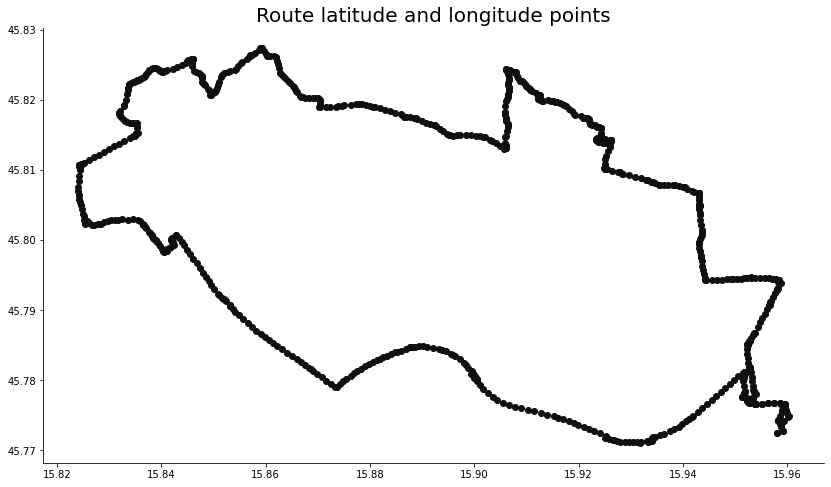

In [3]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

<br>

## Visualize Strava Routes with Folium
- You'll need latitude and longitude for the west part of Zagreb, Croatia
- Everything else is self-explanatory:

In [4]:
route_map = folium.Map(
    location=[45.79757947, 15.9007929],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
display(route_map)

- That doesn't plot the route!
- To do so, iterate over the dataset and add a circle marker:

In [5]:
route_map = folium.Map(
    location=[45.79757947, 15.9007929],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
    ).add_to(route_map)

display(route_map)

- Better, but markers aren't the best option for routes
- You can create a polygon line instead
- Doing so requires you to have latitude and longitude stored as a list of tuples:

In [6]:
route_map = folium.Map(
    location=[45.79757947, 15.9007929],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

- Much better, but what is you want a more simpler map?
- You can use `CartoDBPositron` if you want a minimalistic, light-themed map:

In [11]:
route_map = folium.Map(
    location=[45.79757947, 15.9007929],
    zoom_start=13,
    tiles='CartoDBPositron',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

- If you want the same minimalistic map but in dark theme, use `CartoDBDark_Matter`:

In [8]:
route_map = folium.Map(
    location=[45.79757947, 15.9007929],
    zoom_start=13,
    tiles='CartoDBDark_Matter',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

- You can inspect the available tile options in the documentation
- Check under `tiles`:

In [9]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

- In the next notebook, you'll learn how to calculate the elevation difference between data points and how to visualize the elevation profile of a route.